# Loading and plotting data in chunks

In [1]:
import pandas
from matplotlib import pyplot as plt

## memory usage - loading entire csv

memory usage loading entire csv
Index              128
ID            30118904
STARTTIME    301189040
DURATION      30118904
CPUTIME       30118904
dtype: int64


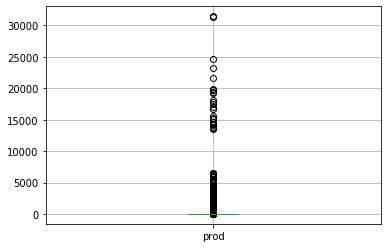

CPU times: user 2.15 s, sys: 168 ms, total: 2.32 s
Wall time: 2.33 s


In [2]:
%%time 
df=pandas.read_csv('log_data.csv')
print("memory usage loading entire csv")
print(df.memory_usage(deep=True))
result = df['DURATION'].value_counts()
data=result.rename_axis('duration').reset_index(name='counts')
data['prod']=data['counts']*data['duration']
data[['prod']].boxplot()
plt.show()

## memory usage - loading csv in chunks

memory usage by chunk_1
Index             128
ID            8000000
STARTTIME    80000000
DURATION      8000000
CPUTIME       8000000
dtype: int64


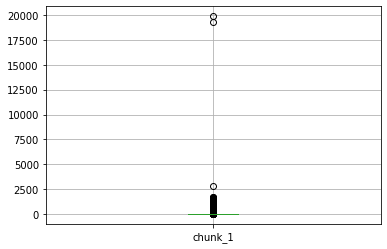

memory usage by chunk_2
Index             132
ID            8000000
STARTTIME    80000000
DURATION      8000000
CPUTIME       8000000
dtype: int64


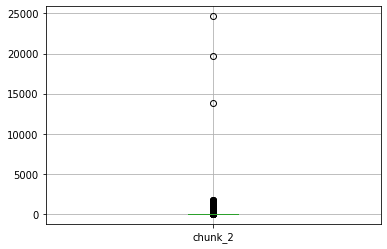

memory usage by chunk_3
Index             132
ID            8000000
STARTTIME    80000000
DURATION      8000000
CPUTIME       8000000
dtype: int64


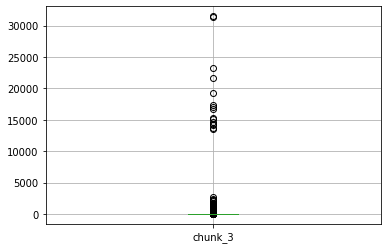

memory usage by chunk_4
Index             132
ID            6118904
STARTTIME    61189040
DURATION      6118904
CPUTIME       6118904
dtype: int64


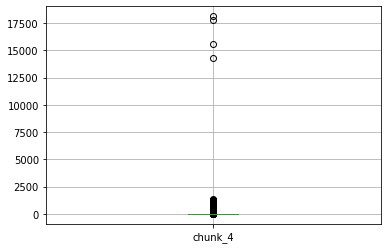

CPU times: user 2.51 s, sys: 148 ms, total: 2.65 s
Wall time: 2.65 s


In [3]:
%%time

result = None
i=1
for chunk in pandas.read_csv("log_data.csv", chunksize=1000000):
    print("memory usage by chunk_"+str(i))
    print(chunk.memory_usage(deep=True))
    voters_street = chunk["DURATION"]
    chunk_result = voters_street.value_counts()
    data=chunk_result.rename_axis('duration').reset_index(name='counts')
    data['chunk_'+str(i)]=data['counts']*data['duration']
    data[['chunk_'+str(i)]].boxplot()
    plt.show()
    if result is None:
        result = chunk_result
    else:
        result = result.add(chunk_result, fill_value=0)
    i+=1
# result.sort_values(ascending=False, inplace=True)
# print(result)